In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def sample_data(size=100, x_matrix=False, min_x=-2.5, max_x=2.5):  # 
    x = (np.random.random(size=size) - 0.5 ) * (max_x - min_x)  # 
    x.sort() # util para graficar
    y = x ** 2 + x + np.random.normal(0, 1, size=size)
    if x_matrix:
        x = x.reshape((-1,1))
    return x, y 


In [3]:
X, y = sample_data(size=100, x_matrix=True) # Generamos los datos de entrenamiento y validación con la función sample_data

In [4]:
np.shape(X)

(100, 1)

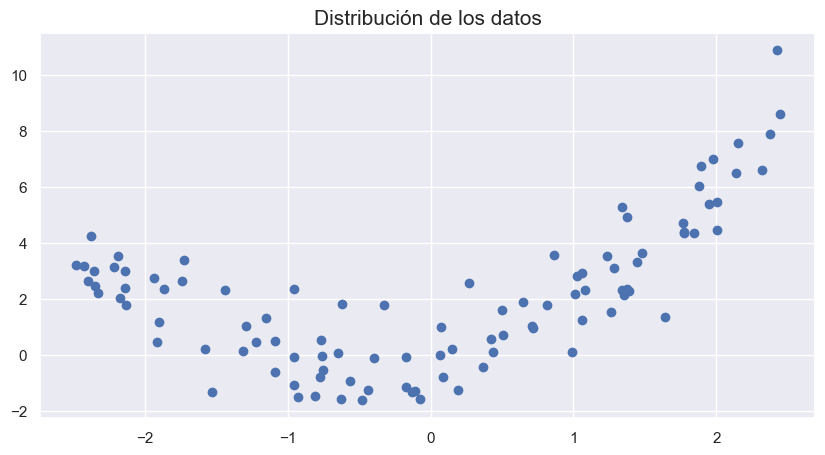

In [5]:
# Graficamos los puntos del dataset

plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.title('Distribución de los datos', fontsize = 15)
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


poly = PolynomialFeatures(2, include_bias=False) # grado 2 

#Entrenamos y transformamos los atributos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos la regresión con los atributos X polinómicos
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

# Instanciamos un nuevo modelo de regresión lineal, pero ahora tendrá los atributos polinómicos que definimos en la celda anterior
reg_2 = LinearRegression()

# Entrenamos la regresión con los atributos X polinómicos
reg_2.fit(X_train_new, y_train)

# Predecimos
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

(70, 2) (30, 2)


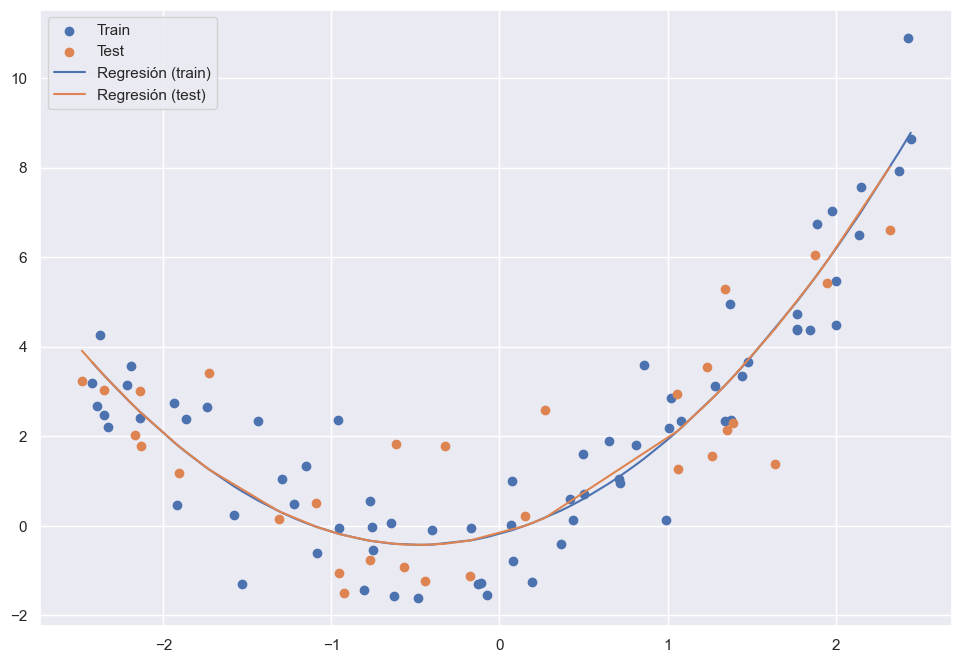

In [18]:
plt.figure(figsize = (40,8))
plt.subplot(1,3,1)

plt.scatter(X_train_new[:,0], y_train, label = 'Train')
plt.scatter(X_test_new[:,0], y_test, label = 'Test')

list1, list2 = zip(*sorted(zip(X_train_new[:,0], y_train_pred_2)))
plt.plot(list1, list2,label ='Regresión (train)')
list1, list2 = zip(*sorted(zip(X_test_new[:,0], y_test_pred_2)))
plt.plot(list1, list2,label = 'Regresión (test)')

plt.legend()
plt.show()

In [16]:
# evaluar el modelo R2, MSE, MAE, RMSE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MAE_train=mean_absolute_error(y_train, y_train_pred_2)
MSE_train=mean_squared_error(y_train, y_train_pred_2)
RMSE_train=np.sqrt(MSE_train)
R2_train=r2_score(y_train, y_train_pred_2)


MAE=mean_absolute_error(y_test, y_test_pred_2)
MSE=mean_squared_error(y_test, y_test_pred_2)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test, y_test_pred_2)

print('MAE_train: ', MAE_train)
print('MSE_train: ', MSE_train)
print('RMSE_train: ', RMSE_train)
print('R2_train: ', R2_train)

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('R2: ', R2)




MAE_train:  0.7992510987402597
MSE_train:  0.9645203673333995
RMSE_train:  0.9820999782778734
R2_train:  0.8645943442320193
MAE:  1.0497722328507242
MSE:  1.6345833898314344
RMSE:  1.278508267408324
R2:  0.6439397553141062


In [9]:
from sklearn.linear_model import LinearRegression

reg_lineal = LinearRegression() # Instanciamos nuestra regresión lineal

reg_lineal.fit(X, y) # Entrenamos

LinearRegression()

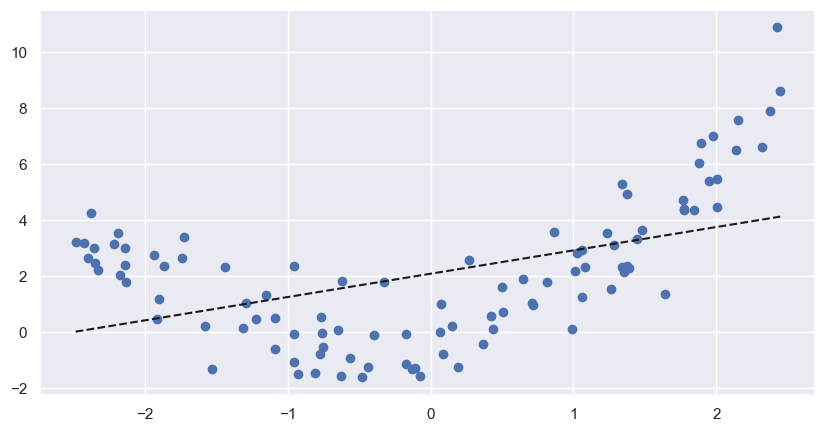

In [10]:
m, M = X.min(), X.max()

plt.figure(figsize=(10,5))
plt.plot([m, M], reg_lineal.predict([[m], [M]]), '--k')
plt.scatter(X, y)
plt.show()